In [58]:

!pip install bs4 requests networkx
import requests
import bs4
import re
from time import sleep
import random
import networkx as nx

import warnings
import logging

warnings.filterwarnings("ignore")
logging.disable(logging.CRITICAL)

When you look at a website using a web browser what you see is a rendered view from an HTML code. This graphical version is much easier for us to read, however, it's not trivial to automatize the process of any data retrieval from it. That's why we will use raw HTML form

The first step is to download the content. We can use a request library. Basic usage is very simple.

In [5]:
headers = {
    'User-Agent': 'IRclasses',
}


response = requests.get('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology', headers=headers)
response.status_code # it's wise to check the status code

2025-10-18 19:44:50 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): en.wikipedia.org:443
2025-10-18 19:44:51 [urllib3.connectionpool] DEBUG: https://en.wikipedia.org:443 "GET /wiki/Pozna%C5%84_University_of_Technology HTTP/1.1" 200 27878


200

In [3]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Poznań University of Technology - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-cont

Working with such a string might be problematic. However, HTML is structured and we can benefit from it. The Beautiful Soup package transforms HTML string into a tree form and allows us to query it in a much more efficient and easier way.

In [8]:
parsed = bs4.BeautifulSoup(response.text)
# parsed

Typically text content is stored in a paragraph element denoted with a 'p' tag. We can take a look at the text from all paragraphs.

In [9]:
for p in parsed.select('p'):
    print(p.getText())



Poznań University of Technology, PUT (Polish: Politechnika Poznańska) is a university in Poznań, Poland.[3] Poznań University of Technology is known as one of the best technical universities in Poland. URAP ranked PUT among the top 6% of world universities and Webometrics ranked it at no. 842 in the world by Google citations for the year 2015. In 1995, it became the first Polish university to become a member of the Conference of European Schools for Advanced Engineering Education and Research (CESAER), an organization comprising the best technical universities in Europe. The university is also a member of the Socrates-Erasmus programme for exchange students from all over Europe, promoting advanced engineering and a European dimension. The university is home to many organizations and student circles, and the radio station Afera 98.6 MHz. The university has over 21,000 students and over 1,100 academic staff.

There are nine faculties (since 2020):

Poznan University of Technology (PUT)

## Task1
Implement a function getText(url)
 - download content from a given url
 - transform it using bs
 - return text from all paragraphs

In [ ]:
def getText(url):

    output = ""
    headers = {
        'User-Agent': 'IRclasses',
    }

    response = requests.get(url, headers=headers)
    
    parsed = bs4.BeautifulSoup(response.text)
    
    for p in parsed.select('p'):
        output += p.getText()

    return output

In [16]:
getText('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')

"\nPoznań University of Technology, PUT (Polish: Politechnika Poznańska) is a university in Poznań, Poland.[3] Poznań University of Technology is known as one of the best technical universities in Poland. URAP ranked PUT among the top 6% of world universities and Webometrics ranked it at no. 842 in the world by Google citations for the year 2015. In 1995, it became the first Polish university to become a member of the Conference of European Schools for Advanced Engineering Education and Research (CESAER), an organization comprising the best technical universities in Europe. The university is also a member of the Socrates-Erasmus programme for exchange students from all over Europe, promoting advanced engineering and a European dimension. The university is home to many organizations and student circles, and the radio station Afera 98.6\xa0MHz. The university has over 21,000 students and over 1,100 academic staff.\nThere are nine faculties (since 2020):\nPoznan University of Technology (

In [17]:
getText("http://wp.pl")

'Pobieranie, zwielokrotnianie, przechowywanie lub jakiekolwiek inne wykorzystywanie treści dostępnych w niniejszym serwisie - bez względu na ich charakter i sposób wyrażenia (w szczególności lecz nie wyłącznie: słowne, słowno-muzyczne, muzyczne, audiowizualne, audialne, tekstowe, graficzne i zawarte w nich dane i informacje, bazy danych i zawarte w nich dane) oraz formę (np. literackie, publicystyczne, naukowe, kartograficzne, programy komputerowe, plastyczne, fotograficzne) wymaga uprzedniej i jednoznacznej zgody Wirtualna Polska Media Spółka Akcyjna z siedzibą w Warszawie, będącej właścicielem niniejszego serwisu, bez względu na sposób ich eksploracji i wykorzystaną metodę (manualną lub zautomatyzowaną technikę, w tym z użyciem programów uczenia maszynowego lub sztucznej inteligencji). Powyższe zastrzeżenie nie dotyczy wykorzystywania jedynie w celu ułatwienia ich wyszukiwania przez wyszukiwarki internetowe oraz korzystania w ramach stosunków umownych lub dozwolonego użytku określone

Nowadays websites are often dynamic, not static. Working with them would require dealing with javascript. It's possible and there are python packages supporting this processing but we will not cover them in this course.

In [18]:
getText("http://facebook.com")

''

## Task 2
Extract number of students from infobox table

In [20]:
response = requests.get('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology', headers=headers)
parsed = bs4.BeautifulSoup(response.text)
parsed.find('table')

<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Question_book-new.svg"><img alt="" class="mw-file-element" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/60px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/120px-Question_book-new.svg.png 1.5x" width="50"/></a></span></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a href="/wiki/Special:EditPage/Pozna%C5%84_University_of_Technology" title="Special:EditPage/Poznań University of Technology"

In this task, you have to extract specific information from a specific table. The table we are interested in is of class infobox and bs allows us to use this information.

In [21]:
parsed.find('table', class_="infobox")

<table class="infobox vcard"><caption class="infobox-title fn org">Poznań University of Technology</caption><tbody><tr><td class="infobox-subheader" colspan="2"><div class="nickname">Politechnika Poznańska</div></td></tr><tr><td class="infobox-full-data nickname" colspan="2"><a class="mw-redirect" href="/wiki/Latin_language" title="Latin language">Latin</a>: <i lang="la">Polytechnica Posnaniensis</i></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Motto</th><td class="infobox-data"><i>Technologies in a positive climate</i></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Type</th><td class="infobox-data"><a href="/wiki/Public_university" title="Public university">Public</a></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Established</th><td class="infobox-data">1955 (1919)</td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;"><a href="/wiki/Rector_(academia)" tit

Since bs creates a tree structure you can navigate through it and use methods find and find_all on the next nodes.

In [65]:
parsed.find('table', class_="infobox").find_all("tr")

[<tr><td class="infobox-subheader" colspan="2"><div class="nickname">Politechnika Poznańska</div></td></tr>,
 <tr><td class="infobox-full-data nickname" colspan="2"><a class="mw-redirect" href="/wiki/Latin_language" title="Latin language">Latin</a>: <i lang="la">Polytechnica Posnaniensis</i></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Motto</th><td class="infobox-data"><i>Technologies in a positive climate</i></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Type</th><td class="infobox-data"><a href="/wiki/Public_university" title="Public university">Public</a></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Established</th><td class="infobox-data">1955 (1919)</td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;"><a href="/wiki/Rector_(academia)" title="Rector (academia)">Rector</a></th><td class="infobox-data">PhD, Prof. Teofil Jesionowski</td></

In [23]:
parsed.find('table', class_="infobox").find_all("tr")[6]

<tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Students</th><td class="infobox-data">14,138<sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup> <small>(12.2023)</small></td></tr>

In [24]:
parsed.find('table', class_="infobox").find_all("tr")[6].find('th').text

'Students'

In [25]:
parsed.find('table', class_="infobox").find_all("tr")[6].find('td').text

'14,138[1] (12.2023)'


Write a function that returns the number of students from the infobox table from the provided URL. You can use inspect tool - just right click on a website, choose inspect and analyze the html structure.

In [81]:
def getStudentCount(url):
    response = requests.get(url, headers=headers)
    parsed = bs4.BeautifulSoup(response.text)
    table = parsed.find('table', class_="infobox").find_all("tr")
    for i in table:
        if i.find('th') and 'Students' in i.find('th').text:
            match = re.match(r'[\d,]+', i.find('td').text)
            if match:
                return int(match.group().replace(',', ''))

In [82]:
assert getStudentCount("https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology") == 14138

In [83]:
assert getStudentCount("https://en.wikipedia.org/wiki/Wroc%C5%82aw_University_of_Science_and_Technology") == 20970

# Regex
Regular expression is a scheme for defining patterns to be found in a text

Let's try it  https://regexone.com/

## Task 3

We can also retrieve URLs and once we have them we can scrape them as well.

In [84]:
parsed.find_all('a')

[<a class="mw-jump-link" href="#bodyContent">Jump to content</a>,
 <a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a>,
 <a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a>,
 <a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a>,
 <a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a>,
 <a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a>,
 <a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a>,
 <a href="/wiki/Help:Contents" title="Guidance on how to use and edit Wikipedia"><span>Help</span></a>,
 <a href="/wiki/Help:Introduction" title="Learn how to edit Wikipedia"><span>Learn to edit</span></a>,
 <a href="/wiki/Wikipedia:Community_portal" title="The

It's important to add some delay between accessing the next page. Otherwise, you might cause too much traffic and be temporarily banned

In [145]:
links = parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})
random.shuffle(links)
for link in links[:10]:
    print(link['href'])
    response = requests.get("https://en.wikipedia.org" + link['href'])
    print(response.status_code)
    sleep(random.random()*3)

/wiki/Special:EditPage/Template:Universities_in_Poland
403
/wiki/Wikipedia:About
403
/wiki/Special:MyContributions
403
/wiki/University_of_Warmia_and_Mazury_in_Olsztyn
403
/wiki/University_College_Dublin
403
/wiki/ETH_Zurich
403
/wiki/University_of_Stuttgart
403
/wiki/Leibniz_University_Hannover
403
/wiki/Socrates-Erasmus
403
/wiki/University_of_%C5%81%C3%B3d%C5%BA
403


implement DFS based on the code above, try to avoid links not leading to an article

In [158]:

def dfs(link):
    max_visited = 10
    visited = set()
    def dfs_run(link, visited):
        sleep(random.random()*3)
        response = requests.get(link, headers=headers)
        parsed = bs4.BeautifulSoup(response.text)
        links = parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})
        random.shuffle(links)
        
        
        for link in links:
            full_link = "https://en.wikipedia.org" + link['href']
            if full_link not in visited and len(visited) < max_visited:
                visited.add(full_link)
                
                
        for link in links:
            full_link = "https://en.wikipedia.org" + link['href']
            if len(visited) >= max_visited:
                return
            dfs_run(full_link, visited)
    dfs_run(link, visited)
    for link in visited:
        print(link)
    return visited

In [159]:
dfs('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')

https://en.wikipedia.org/wiki/Socrates-Erasmus
https://en.wikipedia.org/wiki/Lund_University
https://en.wikipedia.org/wiki/Maria_Curie-Sk%C5%82odowska_University
https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology
https://en.wikipedia.org/wiki/European_Society_for_Engineering_Education
https://en.wikipedia.org/wiki/College_of_Europe
https://en.wikipedia.org/wiki/University_of_Paris-Saclay
https://en.wikipedia.org/wiki/Medical_University_of_Warsaw
https://en.wikipedia.org/wiki/Sapienza_University_of_Rome
https://en.wikipedia.org/wiki/Category:Pages_using_infobox_university_with_the_affiliations_parameter


{'https://en.wikipedia.org/wiki/Category:Pages_using_infobox_university_with_the_affiliations_parameter',
 'https://en.wikipedia.org/wiki/College_of_Europe',
 'https://en.wikipedia.org/wiki/European_Society_for_Engineering_Education',
 'https://en.wikipedia.org/wiki/Lund_University',
 'https://en.wikipedia.org/wiki/Maria_Curie-Sk%C5%82odowska_University',
 'https://en.wikipedia.org/wiki/Medical_University_of_Warsaw',
 'https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology',
 'https://en.wikipedia.org/wiki/Sapienza_University_of_Rome',
 'https://en.wikipedia.org/wiki/Socrates-Erasmus',
 'https://en.wikipedia.org/wiki/University_of_Paris-Saclay'}

write BFS with printing current link

In [162]:
def bfs(link):
    max_visited = 10
    visited = set()
    visited.add(link)
    queue = [link]
    while queue and len(visited) < max_visited:
        current_link = queue.pop(0)
        sleep(random.random()*3)
        response = requests.get(current_link, headers=headers)
        parsed = bs4.BeautifulSoup(response.text)
        links = parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})
        random.shuffle(links)
        for link in links:
            full_link = "https://en.wikipedia.org" + link['href']
            if full_link not in visited and len(visited) < max_visited:
                visited.add(full_link)
                queue.append(full_link)
            if len(visited) >= max_visited:
                break
    for link in visited:
        print(link)
    return visited


bfs('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')

https://en.wikipedia.org/wiki/Witold_Czarnecki
https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology
https://en.wikipedia.org/wiki/University_of_Bia%C5%82ystok
https://en.wikipedia.org/wiki/Conference_of_European_Schools_for_Advanced_Engineering_Education_and_Research
https://en.wikipedia.org/wiki/University_of_Wroc%C5%82aw
https://en.wikipedia.org/wiki/University_of_Paris-Saclay
https://en.wikipedia.org/wiki/Universities_in_Poznan
https://en.wikipedia.org/wiki/Wroc%C5%82aw_University_of_Science_and_Technology
https://en.wikipedia.org/wiki/Jan_Kochanowski_University
https://en.wikipedia.org/wiki/Special:RecentChangesLinked/Pozna%C5%84_University_of_Technology


{'https://en.wikipedia.org/wiki/Conference_of_European_Schools_for_Advanced_Engineering_Education_and_Research',
 'https://en.wikipedia.org/wiki/Jan_Kochanowski_University',
 'https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology',
 'https://en.wikipedia.org/wiki/Special:RecentChangesLinked/Pozna%C5%84_University_of_Technology',
 'https://en.wikipedia.org/wiki/Universities_in_Poznan',
 'https://en.wikipedia.org/wiki/University_of_Bia%C5%82ystok',
 'https://en.wikipedia.org/wiki/University_of_Paris-Saclay',
 'https://en.wikipedia.org/wiki/University_of_Wroc%C5%82aw',
 'https://en.wikipedia.org/wiki/Witold_Czarnecki',
 'https://en.wikipedia.org/wiki/Wroc%C5%82aw_University_of_Science_and_Technology'}

## Networkx

It's a package for working with various networks

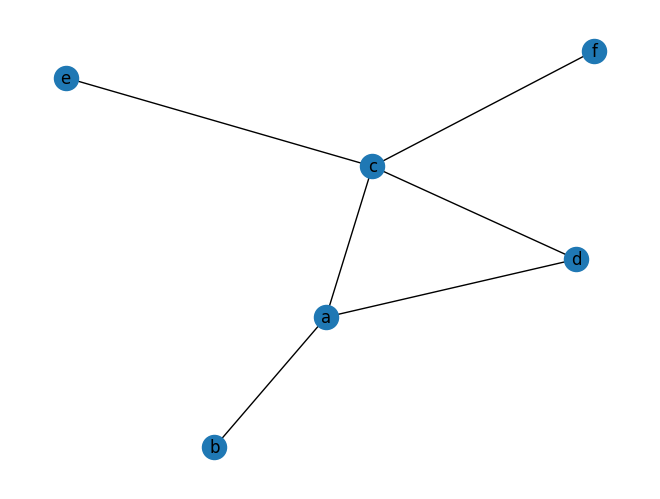

In [164]:
G = nx.Graph()

G.add_edge("a", "b")
G.add_edge("a", "c")
G.add_edge("c", "d")
G.add_edge("c", "e")
G.add_edge("c", "f")
G.add_edge("a", "d")

nx.draw(G, with_labels=True)


Can you plot a graph of Wikipedia links? Extend the bfs function by plotting a network. Limit the search to a reasonable number of nodes.

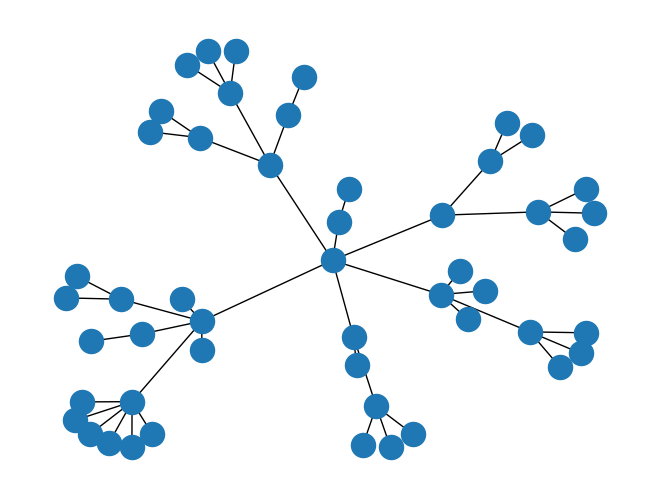

In [190]:
def trim_url(url):
    return re.sub(r'^https://en\.wikipedia\.org/wiki/', '', url)

def bfs_plot(link, max_visited=50, links_from_site=6):
    G = nx.Graph()
    visited = set()
    visited.add(link)
    queue = [link]
    while queue and len(visited) < max_visited:
        current_link = queue.pop(0)
        sleep(random.random()*3)
        response = requests.get(current_link, headers=headers)
        parsed = bs4.BeautifulSoup(response.text)
        links = parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})
        links = sorted(links, key=lambda x: x['href'])
        for link in links[0:links_from_site]:
            full_link = "https://en.wikipedia.org" + link['href']
            if full_link not in visited and len(visited) < max_visited:
                visited.add(full_link)
                queue.append(full_link)
                G.add_edge(trim_url(current_link), trim_url(full_link))
            if len(visited) >= max_visited:
                break
    nx.draw(G, with_labels=False)
    return visited


d = bfs_plot('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')

# Scrapy

Scrapy is an efficient library for web crawling and scraping. It has a slightly higher entrance level than requests + bs but it's much easier for complex tasks.

In [1]:
import requests
import bs4
import re
from time import sleep
import random


import scrapy
from scrapy.crawler import CrawlerProcess
import nest_asyncio
nest_asyncio.apply()

In [2]:
class MySpider(scrapy.Spider):
    name = "lab1"

    start_urls = ['http://quotes.toscrape.com']

    def parse(self, response):
        quotes = response.css('div.quote')
        for quote in quotes: # you can extract data you need
            yield {
                'text': quote.css('.text::text').get(),
                'author': quote.css('.author::text').get(),
            }

        next_page = response.css('li.next a::attr(href)').get() #find next URL
        print(next_page)
        if next_page is not None:
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback=self.parse) #and process it

In [3]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)',
    'CLOSESPIDER_PAGECOUNT': 5
})

process.crawl(MySpider)
process.start()

2025-10-18 19:40:03 [scrapy.utils.log] INFO: Scrapy 2.13.3 started (bot: scrapybot)
2025-10-18 19:40:03 [scrapy.utils.log] INFO: Versions:
{'lxml': '6.0.2',
 'libxml2': '2.11.9',
 'cssselect': '1.3.0',
 'parsel': '1.10.0',
 'w3lib': '2.3.1',
 'Twisted': '25.5.0',
 'Python': '3.13.2 | packaged by Anaconda, Inc. | (main, Feb  6 2025, '
           '18:49:14) [MSC v.1929 64 bit (AMD64)]',
 'pyOpenSSL': '25.3.0 (OpenSSL 3.5.4 30 Sep 2025)',
 'cryptography': '46.0.3',
 'Platform': 'Windows-11-10.0.26100-SP0'}
2025-10-18 19:40:03 [scrapy.addons] INFO: Enabled addons:
[]
2025-10-18 19:40:03 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-10-18 19:40:03 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.windows_events._WindowsSelectorEventLoop
2025-10-18 19:40:03 [scrapy.extensions.telnet] INFO: Telnet Password: fa259629a3033f04
2025-10-18 19:40:03 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats'

/page/2/


2025-10-18 19:40:04 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/2/>
{'text': "“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yoursel

/page/3/


2025-10-18 19:40:04 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/3/>
{'text': '“I love you without knowing how, or when, or from where. I love you simply, without problems or pride: I love you in this way because I do not know any other way of loving but this, in which there is no I or you, so intimate that your hand upon my chest is my hand, so intimate that when I fall asleep your eyes close.”', 'author': 'Pablo Neruda'}
2025-10-18 19:40:04 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/3/>
{'text': '“For every minute you are angry you lose sixty seconds of happiness.”', 'author': 'Ralph Waldo Emerson'}
2025-10-18 19:40:04 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/3/>
{'text': '“If you judge people, you have no time to love them.”', 'author': 'Mother Teresa'}
2025-10-18 19:40:04 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/3/>
{'text': '“Anyone who 

/page/4/


2025-10-18 19:40:04 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/4/>
{'text': "“The more that you read, the more things you will know. The more that you learn, the more places you'll go.”", 'author': 'Dr. Seuss'}
2025-10-18 19:40:04 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/4/>
{'text': '“Of course it is happening inside your head, Harry, but why on earth should that mean that it is not real?”', 'author': 'J.K. Rowling'}
2025-10-18 19:40:04 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/4/>
{'text': '“The truth is, everyone is going to hurt you. You just got to find the ones worth suffering for.”', 'author': 'Bob Marley'}
2025-10-18 19:40:04 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/4/>
{'text': '“Not all of us can do great things. But we can do small things with great love.”', 'author': 'Mother Teresa'}
2025-10-18 19:40:04 [scrapy.core.scraper] DE

/page/5/


2025-10-18 19:40:05 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/5/>
{'text': '“A reader lives a thousand lives before he dies, said Jojen. The man who never reads lives only one.”', 'author': 'George R.R. Martin'}
2025-10-18 19:40:05 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/5/>
{'text': '“You can never get a cup of tea large enough or a book long enough to suit me.”', 'author': 'C.S. Lewis'}
2025-10-18 19:40:05 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/5/>
{'text': '“You believe lies so you eventually learn to trust no one but yourself.”', 'author': 'Marilyn Monroe'}
2025-10-18 19:40:05 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/5/>
{'text': '“If you can make a woman laugh, you can make her do anything.”', 'author': 'Marilyn Monroe'}
2025-10-18 19:40:05 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/5/>
{'text'

/page/6/


## Additional task

Which color of a car is the most expensive? Analyze offers from https://www.olx.pl/motoryzacja/samochody/ some of them leads to olx while other to otomoto. Can you use data from both sources?

In [69]:
def getCarUrls(url):
    response = requests.get(url, headers=headers)
    parsed = bs4.BeautifulSoup(response.text)
    table = parsed.find_all('div', {'data-cy': 'l-card'})
    
    car_urls = []
    for car in table:
        car_url = 'https://www.olx.pl' + car.find('a', class_='css-1tqlkj0').get('href')
        car_urls.append(car_url)
    return car_urls
            
def getCarData(url):
    color = ''
    price = ''
    response = requests.get(url, headers=headers)
    parsed = bs4.BeautifulSoup(response.text)
    table = parsed.find_all('div', {'data-testid': 'ad-parameters-container'})
    for row in table:
        data = row.find_all('p')
        for p in data:
            text = p.getText().strip()
            if 'Kolor:' in text:
                color = text.split(':')[-1].strip()
    table = parsed.find('div', {'data-testid': 'ad-price-container'})
    if table == None:
        return None,None
    price = int(table.find('h3').text[0:-3].replace(' ', ''))
    return price,color
    

cars_url = ['https://www.olx.pl/motoryzacja/samochody/?page=' + str(i) for i in range(10)]


color_data = dict()
urls = []
for i in cars_url:
    urls.extend(getCarUrls(i))
for i in urls:
    if i.find('otomoto') != -1:
        continue
    print(i)
    price, color = getCarData(i)
    if color not in color_data:
        color_data[color] = []
    color_data[color].append(price)



https://www.olx.pl/d/oferta/peugeot-5008-automat-gt-CID5-ID17g1pA.html
https://www.olx.pl/d/oferta/opel-mokka-1-4-turbo-skora-navi-alum-full-CID5-ID17S46g.html
https://www.olx.pl/d/oferta/audi-a7-oryginal-abt-420-km-CID5-ID17CIU0.html
https://www.olx.pl/d/oferta/mazda-mx5-nd-rf-CID5-ID17IF4U.html
https://www.olx.pl/d/oferta/kia-sportage-okazja-przebieg-14-900km-gwarancja-pl-do-2029r-zamiana-CID5-ID17NF1L.html
https://www.olx.pl/d/oferta/poszanowane-audi-a6-c6-lift-2-0tdi-navi-skora-okazja-CID5-ID17IwTI.html
https://www.olx.pl/d/oferta/honda-accord2015r2-0-lpgautomatbogata-wersjaplgwarancja-CID5-ID17HMMg.html
https://www.olx.pl/d/oferta/vw-passat-alltrack-2-0-tdi-240hp-webasto-projektory-dsg-automat-CID5-ID17H8Gw.html
https://www.olx.pl/d/oferta/kia-optima2-0bnawigacjakamera-cofaniadvd10androidzarejestrowany-CID5-ID17NErC.html
https://www.olx.pl/d/oferta/skoda-octavia-4-2-0-tdi-dsg-canton-CID5-ID17Osqx.html
https://www.olx.pl/d/oferta/bmw-5-g30-lift-okazja-vat23-salon-polska-CID5-ID17NB

Niebieski 47304.31707317073


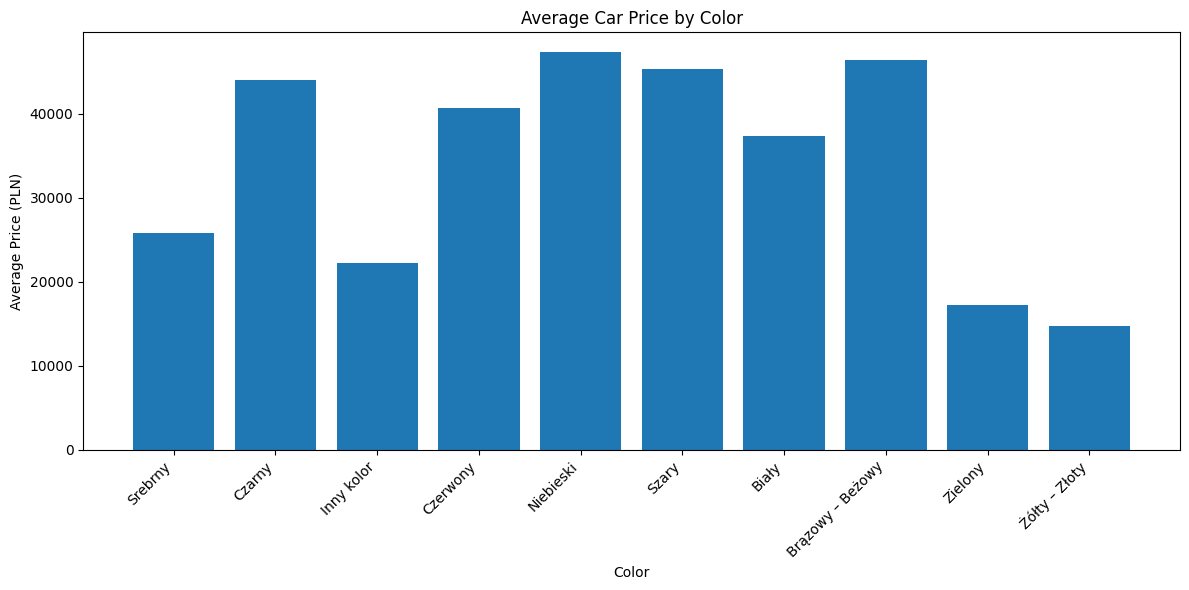

In [74]:
import matplotlib.pyplot as plt

color_plot = dict()
for color in color_data:
    color_plot[color] = sum(color_data[color]) / len(color_data[color])

plt.figure(figsize=(12, 6))
plt.bar(color_plot.keys(), color_plot.values())
plt.xticks(rotation=45, ha='right')
plt.title('Average Car Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price (PLN)')
plt.tight_layout()


print(max(color_plot, key=color_plot.get), color_plot[max(color_plot, key=color_plot.get)])

<details>

<summary>Bonus</summary>

Funny website for scraping https://web.archive.org/web/20190615072453/https://sirius.cs.put.poznan.pl/~inf66204/WKC.html
</details>